### Table of Contents

* [Goals](#Goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Annual Income Investigation](#section2_1)
* [Exploratory Data Analysis](#EDA)
    * [Dealer Performance Analysis](#section3_1)
    * [Companies Analysis](#section3_2)
    * [Customers Demographics](#section3_3)
    * [Regional Analysis](#section3_4)
    * [Engine & Transmission Preferences](#section3_5)
    * [Color & Body Style Preferences](#section3_6)
* [Conclusion](#conclusion)

### Goals <a class="anchor" id="Goals"></a>
This notebook presents an exploration of car sales data spanning 2022-2023. The objectives of this analysis are:

* Gain an understanding of the dataset and its organization
* Clean and prepare the data for thorough analysis
* Develop inquiries based on observable trends within the dataset
* Investigate and analyze the data to reveal key patterns, correlations, and insights
* Utilize visualizations to emphasize sales trends by brand, model,e and ovr time


### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/datasets/missionjee/car-sales-report](https://www.kaggle.com/datasets/missionjee/car-sales-report)

#### Loading the Data <a class="anchor" id="section1_1"></a>

First, the necessary libraries are imported into the notebook to facilitate data analysis. The `pandas` library is used to load the sales data from `Car_Data.csv`. The initial step involves previewing the first ten rows of the DataFrame to understand its structure and content:


In [392]:
# Import python libraries for project goals
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

In [393]:
# Load dataset
cardata = pd.read_csv('Car_Data.csv')
# See first ten rows
print(cardata.head(10))

         Car_id      Date Customer Name  Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine    Male          13500   
1  C_CND_000002  1/2/2022           Gia    Male        1480000   
2  C_CND_000003  1/2/2022        Gianna    Male        1035000   
3  C_CND_000004  1/2/2022       Giselle    Male          13500   
4  C_CND_000005  1/2/2022         Grace    Male        1465000   
5  C_CND_000006  1/2/2022     Guadalupe    Male         850000   
6  C_CND_000007  1/2/2022        Hailey    Male        1600000   
7  C_CND_000008  1/2/2022        Graham    Male          13500   
8  C_CND_000009  1/2/2022         Naomi    Male         815000   
9  C_CND_000010  1/2/2022       Grayson  Female          13500   

                           Dealer_Name     Company       Model  \
0  Buddy Storbeck's Diesel Service Inc        Ford  Expedition   
1                     C & M Motors Inc       Dodge     Durango   
2                          Capitol KIA    Cadillac    Eldorado   
3        

#### Data Information <a class="anchor" id="section1_2"></a>

Some immediate insights are:
* There are 16 columns and 23906 rows overall.
* The name and datatype of each column - most values are objects in this dataset.
* Column names can be changed for consistency and facilitating the analysis.
* Columns such as `Customer Name`, `Dealer_No `, `Phone`, and `Car_id` can be dropped as they are not needed for this project
* `Date` column should be changed into datetime type for analysis purposes.
* There is no missing data. 

In [395]:
# Check data for null values and datatypes
print(cardata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB
None


### Data Cleaning <a class="anchor" id="cleaning"></a>

It was decided to firstly clear dataset, before exploring summary statistics for `Annual Income` and `Price`. As mentioned before, 4 columns were deleted and column names were transformed into consistent format. `Date` column was changed into datatime type.

In [397]:
# Dropping columns unnecessary for analysis
cardata = cardata.drop(['Phone', 'Dealer_No ', 'Car_id', 'Customer Name'], axis=1)

# Renaming the remaining columns to lowercase with underscores
cardata.columns = cardata.columns.str.lower().str.replace(' ', '_')
# Renaming the 'price_($)' column to 'price'
cardata = cardata.rename(columns={'price_($)': 'price'})

# Verify the changes
print(cardata.head())

       date gender  annual_income                          dealer_name  \
0  1/2/2022   Male          13500  Buddy Storbeck's Diesel Service Inc   
1  1/2/2022   Male        1480000                     C & M Motors Inc   
2  1/2/2022   Male        1035000                          Capitol KIA   
3  1/2/2022   Male          13500               Chrysler of Tri-Cities   
4  1/2/2022   Male        1465000                    Chrysler Plymouth   

    company       model                     engine transmission       color  \
0      Ford  Expedition  DoubleÂ Overhead Camshaft         Auto       Black   
1     Dodge     Durango  DoubleÂ Overhead Camshaft         Auto       Black   
2  Cadillac    Eldorado          Overhead Camshaft       Manual         Red   
3    Toyota      Celica          Overhead Camshaft       Manual  Pale White   
4     Acura          TL  DoubleÂ Overhead Camshaft         Auto         Red   

   price body_style dealer_region  
0  26000        SUV    Middletown  
1  19000

In [398]:
cardata.date = pd.to_datetime(cardata.date)
print(cardata.date)

0       2022-01-02
1       2022-01-02
2       2022-01-02
3       2022-01-02
4       2022-01-02
           ...    
23901   2023-12-31
23902   2023-12-31
23903   2023-12-31
23904   2023-12-31
23905   2023-12-31
Name: date, Length: 23906, dtype: datetime64[ns]


In [399]:
# Display statistical summary of the numerical columns in the DataFrame
print(cardata[['annual_income','price']].describe())

       annual_income         price
count   2.390600e+04  23906.000000
mean    8.308403e+05  28090.247846
std     7.200064e+05  14788.687608
min     1.008000e+04   1200.000000
25%     3.860000e+05  18001.000000
50%     7.350000e+05  23000.000000
75%     1.175750e+06  34000.000000
max     1.120000e+07  85800.000000


`Annual Income`:
* The average annual income is 830,840.
* The income ranges from minimum of 10,080 to a maximum of 11,200,000.
* The average income is notably high, indicating a potential skew towards affluent individuals.
* The large standard deviation of 720,006 suggests considerable variation in income levels.
* Such data raises questions about the distribution of the dataset and may indicate a presence of outliers.
* Further investigation is needed to understand the income dynamics within the dataset.

`Price`:
* The average car price is 28,090.
* The price ranges from a minimum of 1,200 to a maximum of 85,800.
* The price column shows a wide range of car prices, with the majority of cars priced around the median of $23,000, indicating a mix of mid-range and high-end vehicles.

#### Annual Income Investigation <a class="anchor" id="section2_1"></a>

The basic summary statistics revealed potential issues with the distribution of the `Annual Income` column. To ensure accurate analysis, it is necessary to investigate the column further and apply any necessary adjustment.


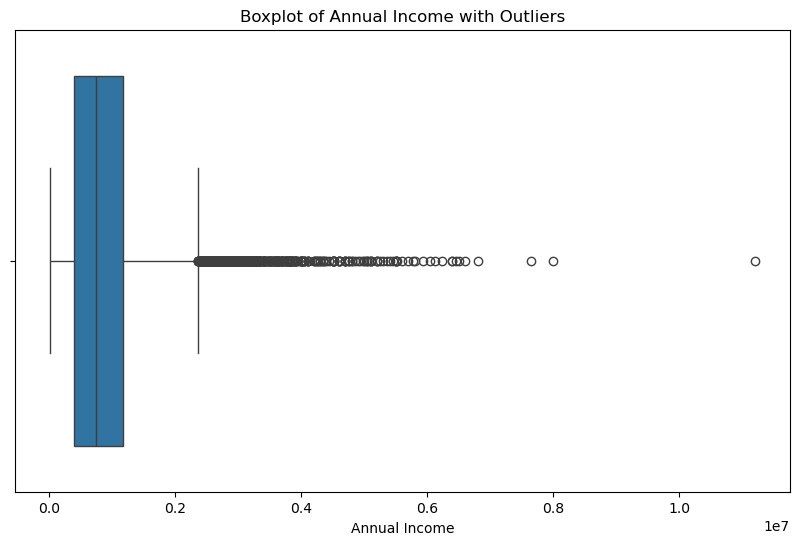

In [402]:
# Boxplot to visualize outliers in the annual income column
plt.figure(figsize=(10, 6))
sns.boxplot(x='annual_income', data=cardata)
plt.title('Boxplot of Annual Income with Outliers')
plt.xlabel('Annual Income')
plt.show()

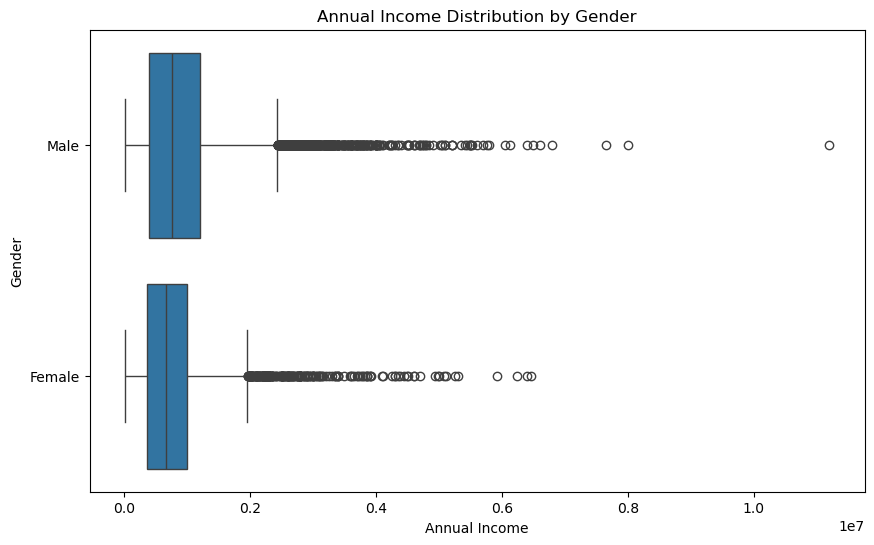

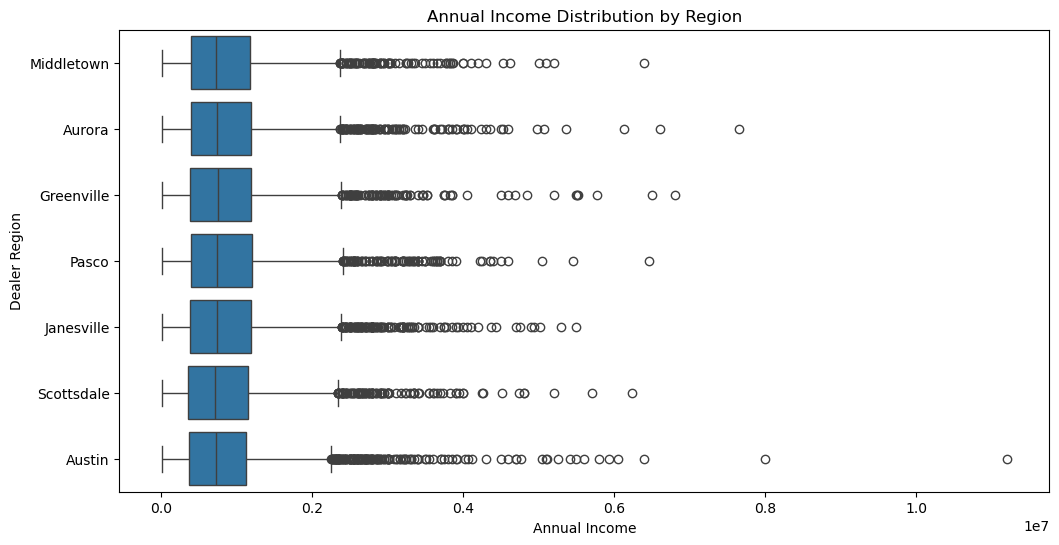

In [403]:
# Boxplot by gender to compare income distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='annual_income', y='gender', data=cardata)
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Gender')
plt.show()

# Boxplot by dealer region to compare income distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='annual_income', y='dealer_region', data=cardata)
plt.title('Annual Income Distribution by Region')
plt.xlabel('Annual Income')
plt.ylabel('Dealer Region')
plt.show()


The investigation revealed a significant number of outliers in the `Annual Income` column, which could heavily influence the dataset's analysis. A threshold of 2,000,000 was set, and values above this limit were removed.


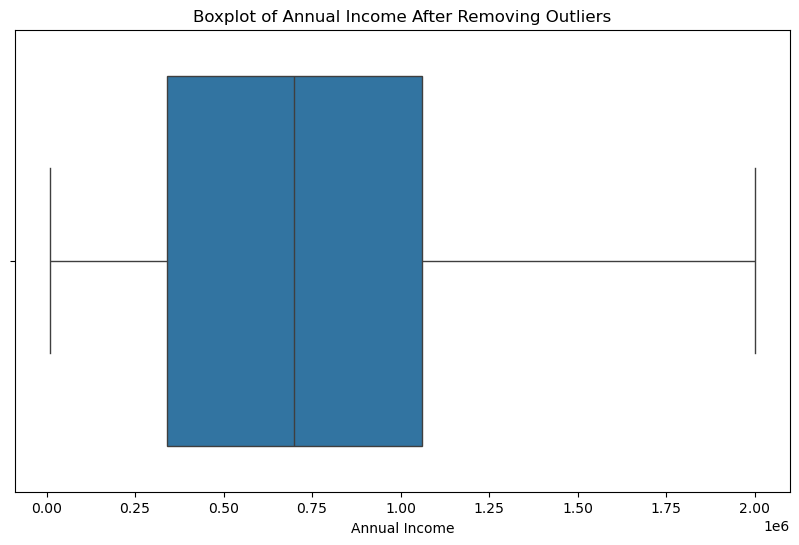

In [405]:
# Set a threshold to remove outliers (e.g., incomes above 2 million)
threshold = 2000000
cardata = cardata[cardata['annual_income'] <= threshold]

# Visualize the new clean dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='annual_income', data=cardata)
plt.title('Boxplot of Annual Income After Removing Outliers')
plt.xlabel('Annual Income')
plt.show()


Cleaned dataset now has 12 columns and 22565 rows that are ready to be analyzed.

In [407]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22565 entries, 0 to 23905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           22565 non-null  datetime64[ns]
 1   gender         22565 non-null  object        
 2   annual_income  22565 non-null  int64         
 3   dealer_name    22565 non-null  object        
 4   company        22565 non-null  object        
 5   model          22565 non-null  object        
 6   engine         22565 non-null  object        
 7   transmission   22565 non-null  object        
 8   color          22565 non-null  object        
 9   price          22565 non-null  int64         
 10  body_style     22565 non-null  object        
 11  dealer_region  22565 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 2.2+ MB


### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

As DataFrame is now ready for EDA, next topics were considered as worth the exploration:
* [Dealer Performance Analysis](#section3_1)
* [Companies Analysis](#section3_2)
* [Customers Demographics](#section3_3)
* [Regional Analysis](#section3_4)
* [Engine & Transmission Preferences](#section3_5)
* [Color & Body Style Preferences](#section3_6)

This comprehensive analysis aims to uncover significant trends and relationships within the car sales data, ultimately facilitating data-driven decision-making and strategic planning.

#### Dealer Perfomance Analysis <a class="anchor" id="section3_1"></a>

* This section focuses on evaluating the performance of different car dealers based on key financial metrics such as total revenue and average car prices.
* The results will highlight which dealers stand out in terms of revenue and pricing, allowing for a deeper exploration of factors contributing to their performance.

In [410]:
# Group by dealer_name and sum the price to calculate total revenue for each dealer
dealer_revenue = cardata.groupby('dealer_name')['price'].sum().reset_index()

# Sort the dealers by total revenue in descending order
dealer_revenue_sorted = dealer_revenue.sort_values(by='price', ascending=False).reset_index(drop=True)

# Display the top dealers by total revenue
dealer_revenue_sorted

,dealer_name,price
0,Rabun Used Car Sales,35450782
1,Progressive Shippers Cooperative Association No,34628187
2,U-Haul CO,33809470
3,Scrivener Performance Engineering,33428210
4,Star Enterprises Inc,33293330
5,Saab-Belle Dodge,33119545
6,Ryder Truck Rental and Leasing,33063684
7,Tri-State Mack Inc,33020440
8,Race Car Help,32899732
9,Suburban Ford,32681945


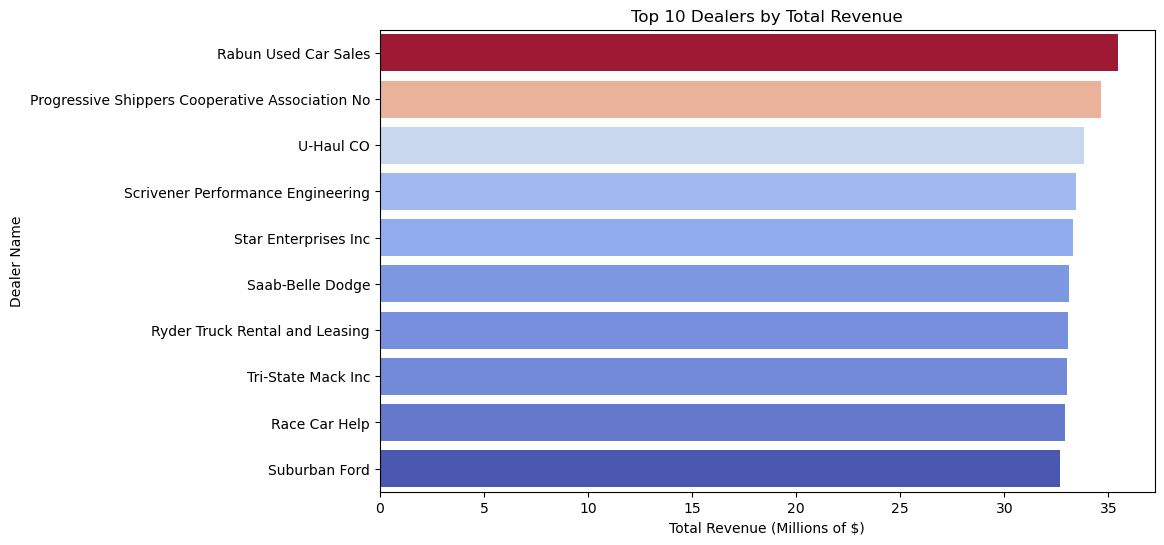

In [411]:
# Plot top 10 dealers by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='dealer_name', data=dealer_revenue_sorted.head(10), hue='price', palette='coolwarm')
plt.title('Top 10 Dealers by Total Revenue')
plt.xlabel('Total Revenue (Millions of $)')
plt.ylabel('Dealer Name')
plt.xticks(ticks=[0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000, 35000000], 
           labels=[0, 5, 10, 15, 20, 25, 30, 35])
plt.legend([], [], frameon=False)
plt.show()


The dealer with the highest total revenue is Rabun Used Car Sales with a revenue of 35.45 million, closely followed by Progressive Shippers Cooperative Association No and U-Haul CO, which have revenues of 34.63 million and 33.81 million respectively. These dealers likely have a large volume of sales, contributing to their high revenue figures.

In [413]:
# Group by dealer_name and calculate the average car price for each dealer
average_price_by_dealer = cardata.groupby('dealer_name')['price'].mean().reset_index()

# Sort the dealers by average car price in descending order and reset the index
average_price_by_dealer_sorted = average_price_by_dealer.sort_values(by='price', ascending=False).reset_index(drop=True)

# Display the top 10 dealers by average car price
average_price_by_dealer_sorted


,dealer_name,price
0,U-Haul CO,28603.612521
1,Rabun Used Car Sales,28543.302738
2,Iceberg Rentals,28521.991468
3,Classic Chevy,28452.784746
4,Gartner Buick Hyundai Saab,28359.246180
5,Scrivener Performance Engineering,28209.459916
6,Star Enterprises Inc,28190.795936
7,Suburban Ford,28149.823428
8,Capitol KIA,28127.756803
9,Saab-Belle Dodge,28091.217133


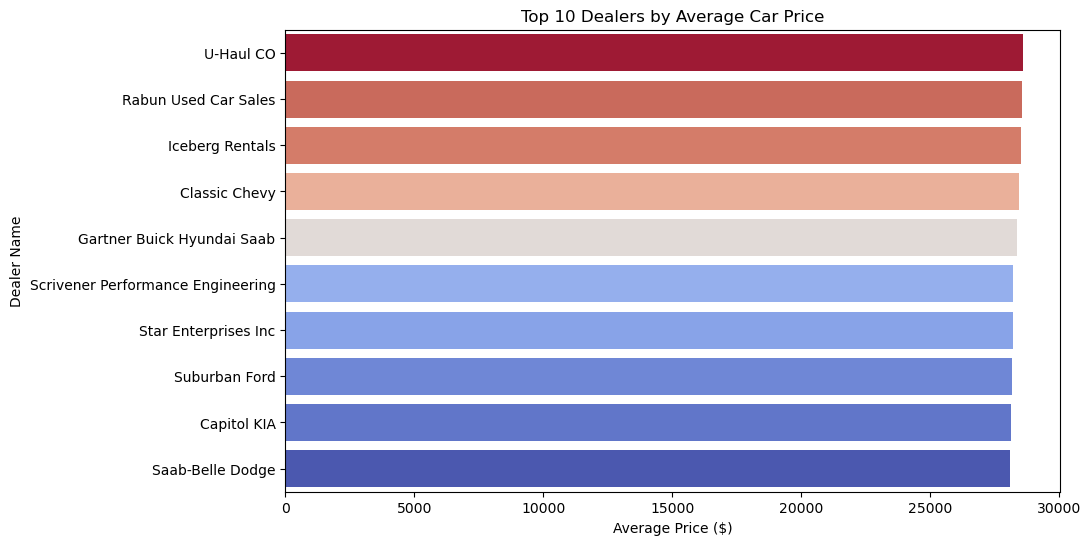

In [414]:
# Plot top 10 dealers by average car price
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='dealer_name', data=average_price_by_dealer_sorted.head(10), hue='price', palette='coolwarm')

# Add title and labels
plt.title('Top 10 Dealers by Average Car Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Dealer Name')
plt.legend([],[], frameon=False)
plt.show()

The average car prices reveal a trend where U-Haul CO offers the highest average price per car at $28,603.61, while Classic Chevy and Rabun Used Car Sales follow closely behind. This suggests that these dealers may focus on selling higher-end or more expensive vehicles, contributing to their revenue despite potentially lower sales volume.

Revenue vs. Price: Interestingly, some dealers like U-Haul CO rank high in both total revenue and average price, while others such as Progressive Shippers Cooperative Association No perform well in terms of revenue but offer relatively lower average prices. This may indicate different sales strategies, with some dealers focusing on volume and others on premium pricing.

#### Companies Analysis <a class="anchor" id="section3_2"></a>

* This section provides a comprehensive analysis of car companies based on crucial metrics like overall sales volume, total revenue, and average car prices.
* By evaluating these factors, it is possible to uncover which companies dominate the market and identify the most popular car models, helping us understand consumer preferences and company performance.

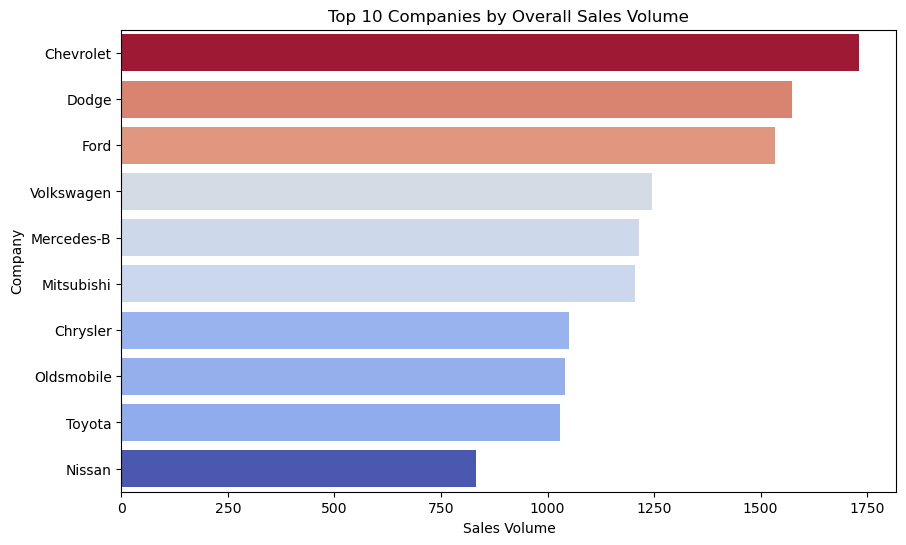

,company,total_sales_volume
0,Chevrolet,1732
1,Dodge,1573
2,Ford,1533
3,Volkswagen,1246
4,Mercedes-B,1214
5,Mitsubishi,1206
6,Chrysler,1050
7,Oldsmobile,1040
8,Toyota,1030
9,Nissan,831


In [418]:
# Calculate total sales volume for each company
sales_volume = cardata['company'].value_counts().reset_index()
sales_volume.columns = ['company', 'total_sales_volume']

# Sort by total sales volume in descending order
sales_volume_sorted = sales_volume.sort_values(by='total_sales_volume', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales_volume', y='company', data=sales_volume_sorted.head(10), hue='total_sales_volume', palette='coolwarm')
plt.title('Top 10 Companies by Overall Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Company')
plt.legend([],[], frameon=False)
plt.show()

sales_volume_sorted.head(10)

* Chevrolet leads the market with a sales volume of 1,732 units, indicating a strong consumer preference and brand loyalty.
* Dodge and Ford follow closely behind with sales volumes of 1,573 and 1,533 units, respectively, suggesting effective marketing strategies and popular model offerings.
* The competition among these brands highlights the importance of both product appeal and marketing effectiveness in driving sales volume

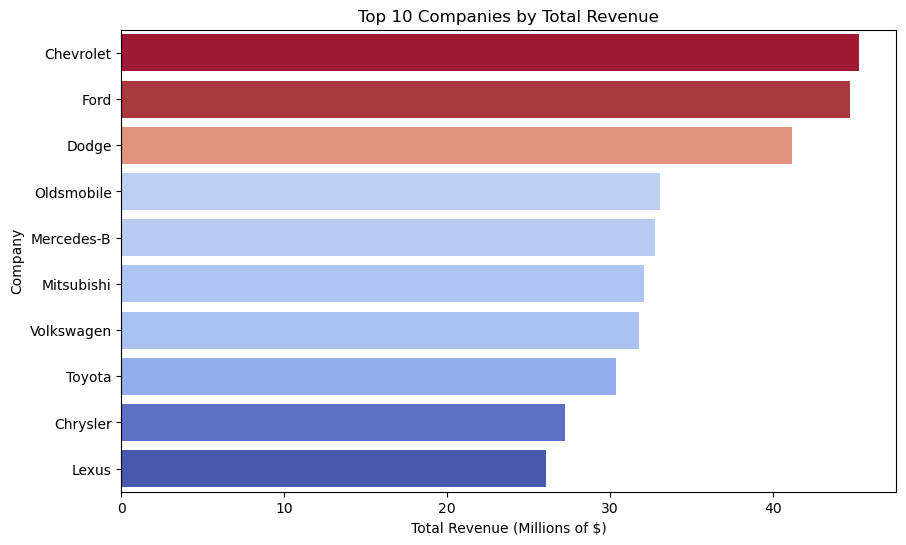

,company,total_revenue
5,Chevrolet,45330736
8,Ford,44771409
7,Dodge,41194273
20,Oldsmobile,33080958
16,Mercedes-B,32752346
18,Mitsubishi,32090246
28,Volkswagen,31772057
27,Toyota,30397443
6,Chrysler,27217704
14,Lexus,26100990


In [420]:
# Calculate total revenue for each company
revenue = cardata.groupby('company')['price'].sum().reset_index()
revenue.columns = ['company', 'total_revenue']

# Sort by total revenue in descending order
revenue_sorted = revenue.sort_values(by='total_revenue', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='total_revenue', y='company', data=revenue_sorted.head(10), hue='total_revenue', palette='coolwarm')
plt.title('Top 10 Companies by Total Revenue')
plt.xlabel('Total Revenue (Millions of $)')
plt.ylabel('Company')
plt.xticks(ticks=[0, 10000000, 20000000, 30000000, 40000000], 
           labels=[0, 10, 20, 30, 40])
plt.legend([],[], frameon=False)
plt.show()

revenue_sorted.head(10)

* In terms of revenue, Chevrolet also tops the chart with 45,330,736, showing that it not only sells well but also commands higher prices for its vehicles.
* Ford ranks second with 44,771,409 in revenue, reflecting its strong market presence and diverse vehicle lineup. Dodge follows closely behind with 41,194,273, demonstrating its ability to generate significant revenue through a combination of solid sales volume and competitive pricing. 
* This correlation between sales volume and revenue underscores the financial strength of these brands and their ability to maintain profitability through effective pricing strategies.

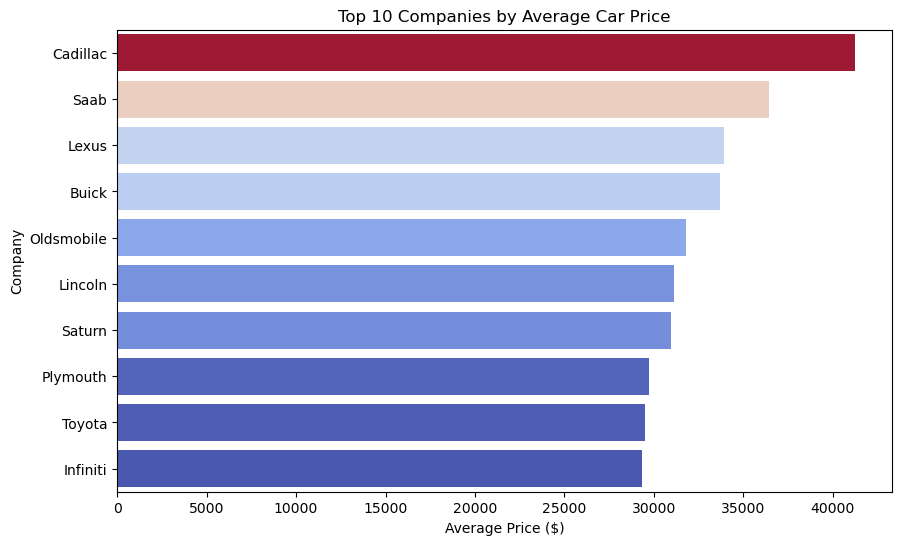

,company,average_price
4,Cadillac,41255.208955
24,Saab,36415.030303
14,Lexus,33941.469441
3,Buick,33681.129496
20,Oldsmobile,31808.613462
15,Lincoln,31119.695745
25,Saturn,30976.373646
21,Plymouth,29703.865188
27,Toyota,29512.080583
11,Infiniti,29360.852459


In [422]:
# Calculate average car price for each company
avg_price = cardata.groupby('company')['price'].mean().reset_index()
avg_price.columns = ['company', 'average_price']

# Sort by average price in descending order
avg_price_sorted = avg_price.sort_values(by='average_price', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='average_price', y='company', data=avg_price_sorted.head(10), hue='average_price',  palette='coolwarm')
plt.title('Top 10 Companies by Average Car Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Company')
plt.legend([],[], frameon=False)
plt.show()

avg_price_sorted.head(10)

* Cadillac has the highest average car price at 41,255.21, indicating its position as a luxury brand catering to a more affluent customer base.
* Other brands like Saab and Lexus also feature high average prices, reinforcing their focus on premium offerings in the market.
* The emphasis on higher average prices suggests that these companies may prioritize quality and luxury over sheer sales volume, targeting niche markets.

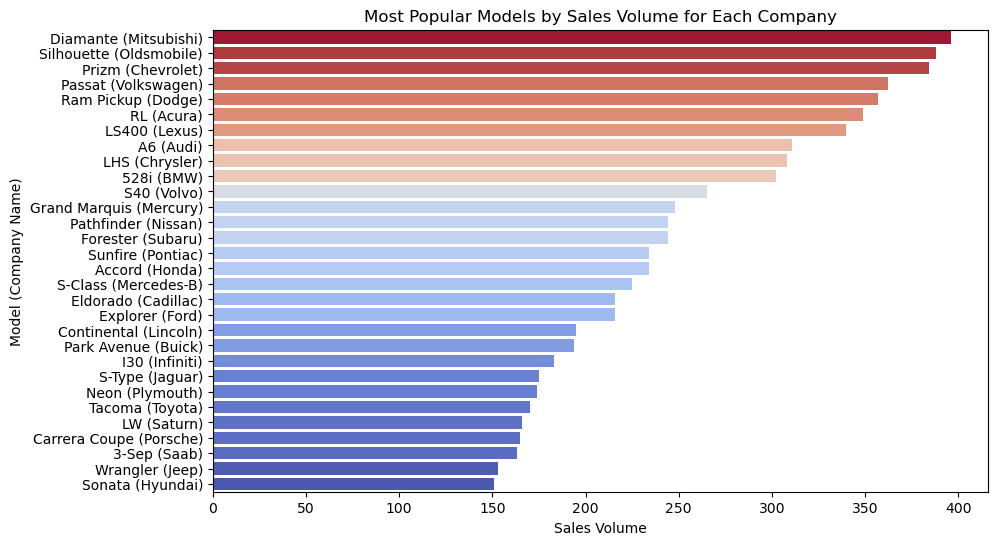

Average Prices of Most Popular Models:
Diamante (Mitsubishi): $22051.88
Silhouette (Oldsmobile): $29873.30
Prizm (Chevrolet): $22993.99
Passat (Volkswagen): $19551.31
Ram Pickup (Dodge): $27477.97
RL (Acura): $23641.06
LS400 (Lexus): $40356.82
A6 (Audi): $22766.29
LHS (Chrysler): $27482.03
528i (BMW): $29461.98
S40 (Volvo): $27696.73
Grand Marquis (Mercury): $28847.66
Pathfinder (Nissan): $32845.54
Forester (Subaru): $22499.34
Sunfire (Pontiac): $33007.76
Accord (Honda): $27144.53
S-Class (Mercedes-B): $28334.47
Eldorado (Cadillac): $42075.01
Explorer (Ford): $32131.81
Continental (Lincoln): $42063.44
Park Avenue (Buick): $41793.55
I30 (Infiniti): $29360.85
S-Type (Jaguar): $25290.71
Neon (Plymouth): $23290.21
Tacoma (Toyota): $44836.08
LW (Saturn): $22775.22
Carrera Coupe (Porsche): $20959.01
3-Sep (Saab): $37813.91
Wrangler (Jeep): $19737.34
Sonata (Hyundai): $18048.54


In [424]:
# Calculate the most popular model for each company based on sales volume
popular_models = cardata.groupby(['company', 'model']).size().reset_index(name='sales_volume')
most_popular_models = popular_models.loc[popular_models.groupby('company')['sales_volume'].idxmax()]

# Merge to get the average price of each model
average_prices = cardata.groupby(['company', 'model'])['price'].mean().reset_index()
most_popular_models = most_popular_models.merge(average_prices, on=['company', 'model'])

# Sort by sales volume
most_popular_models_sorted = most_popular_models.sort_values(by='sales_volume', ascending=False)

# Create a new column for x-tick labels
most_popular_models_sorted['model_with_company'] = most_popular_models_sorted['model'] + ' (' + most_popular_models_sorted['company'] + ')'

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_volume', y='model_with_company', data=most_popular_models_sorted, dodge=False, hue='sales_volume', palette='coolwarm')
plt.title('Most Popular Models by Sales Volume for Each Company')
plt.xlabel('Sales Volume')
plt.ylabel('Model (Company Name)')
plt.legend([],[], frameon=False)
plt.show()

# Print the average prices of the most popular models
print("Average Prices of Most Popular Models:")
for index, row in most_popular_models_sorted.iterrows():
    print(f"{row['model']} ({row['company']}): ${row['price']:.2f}")
    

* The analysis of the average prices of popular models reveals significant variations, with models like the Diamante (Mitsubishi) priced at 22,051.88 and the S-Class (Mercedes-B) reaching 28,334.47.
* These prices reflect the strategies of different brands, where premium models are priced higher to reflect their quality and features.
* The popularity of models such as the Ram Pickup (Dodge) and Eldorado (Cadillac) illustrates the impact of consumer preferences on sales and pricing strategies.

#### Customers Demographics <a class="anchor" id="section3_3"></a>

* This section delves into the demographics of car buyers, focusing on critical factors such as gender distribution, income levels, and their potential influence on car purchasing behavior.
* Examining these aspects provides insights into consumer preferences, identifies trends among different demographic groups, and explores how these factors contribute to the popularity of specific car brands and models.

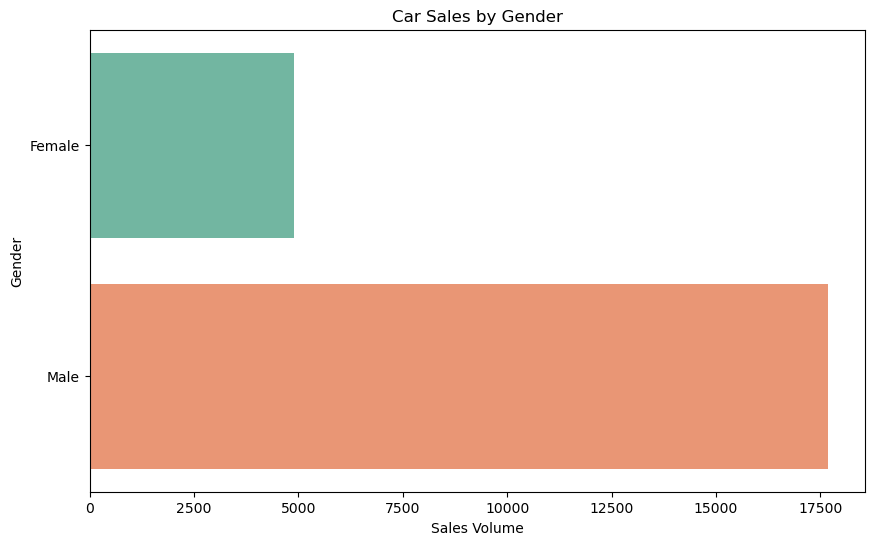

   gender  sales_volume
0  Female          4891
1    Male         17674


<Figure size 1000x600 with 0 Axes>

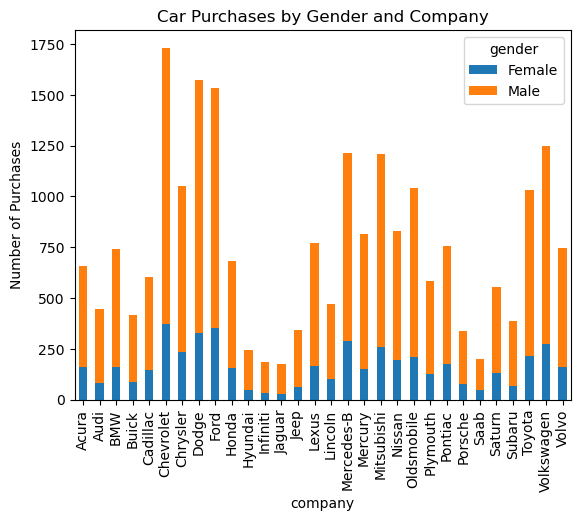

In [427]:
# Calculate sales volume by gender
gender_sales = cardata.groupby('gender').size().reset_index(name='sales_volume')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_volume', y='gender', data=gender_sales, hue='gender', palette='Set2', orient='h')
plt.title('Car Sales by Gender')
plt.xlabel('Sales Volume')
plt.ylabel('Gender')
plt.show()

print(gender_sales)

# Group by 'Gender' and 'Company', then count the number of purchases
gender_company = cardata.groupby(['gender', 'company']).size().reset_index(name='count')

# Pivot the table to make it easier for analysis
gender_company_pivot = gender_company.pivot(index='company', columns='gender', values='count').fillna(0)

# Plotting the distribution of car purchases by gender for each company
plt.figure(figsize=(10, 6))
gender_company_pivot.plot(kind='bar', stacked=True)
plt.title('Car Purchases by Gender and Company')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=90)
plt.show()


* The demographic analysis of car sales indicates a significant gender disparity, with 17,674 male buyers compared to 4,891 female buyers. This suggests that the automotive market may be predominantly male-oriented, highlighting a potential area for targeted marketing efforts aimed at female consumers to increase their representation in car sales.

* When examining the performance of different car brands across these demographics, it is clear that certain brands resonate more strongly with male buyers. For instance, Chevrolet and Dodge lead with sales figures of 1,362 and 1,246 units respectively, demonstrating their strong appeal in the market. Additionally, brands like Ford and Mercedes-Benz also show significant sales, with 1,181 and 926 units sold, respectively.

* In contrast, brands such as Infiniti and Jaguar have relatively lower sales figures, with only 150 and 145 units sold, indicating they may be less popular among the current consumer base or may cater to a niche market.

* The data suggests that car manufacturers should consider the varying preferences across demographics. Strategies aimed at enhancing female engagement, such as marketing campaigns and focusing on vehicle attributes that resonate with women (like safety, eco-friendliness, and technology features), could help improve sales among female consumers.

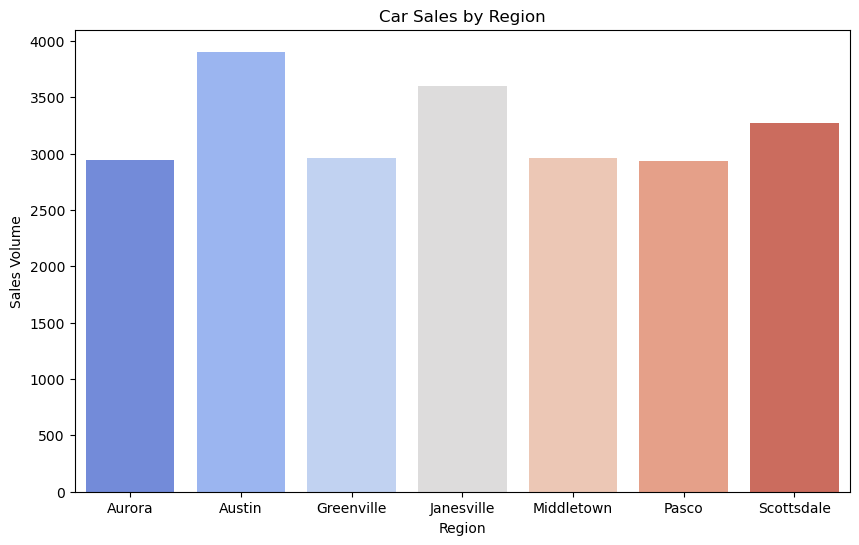

,dealer_region,sales_volume
0,Aurora,2940
1,Austin,3904
2,Greenville,2957
3,Janesville,3600
4,Middletown,2965
5,Pasco,2931
6,Scottsdale,3268


In [429]:
# Calculate sales volume by region
region_sales = cardata.groupby('dealer_region').size().reset_index(name='sales_volume')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='dealer_region', y='sales_volume', data=region_sales, hue='dealer_region', palette='coolwarm')
plt.title('Car Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales Volume')
plt.show()

region_sales

Austin stands out with the highest sales figure at 3,904, indicating a strong market presence and demand for vehicles in that area. Following closely are Janesville with 3,600 sales and Scottsdale at 3,268, suggesting that these regions also have substantial automotive markets.

Cities like Aurora and Pasco exhibit lower sales figures, at 2,940 and 2,931 respectively, indicating potential market constraints or less consumer demand for new vehicles. The overall distribution highlights that while some regions demonstrate robust automotive sales, others may require targeted marketing strategies to stimulate growth and improve sales performance. 

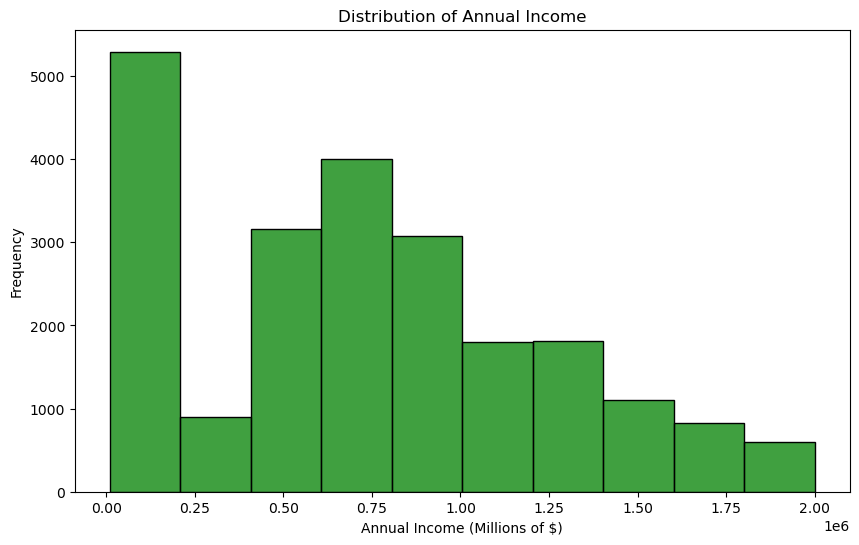

In [431]:
# Plot income distribution
plt.figure(figsize=(10, 6))
sns.histplot(cardata['annual_income'], bins=10, color='green')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (Millions of $)')
plt.ylabel('Frequency')
plt.show()


* The majority of individuals in the dataset seem to have annual incomes below 500,000, with a very high frequency around the 0 to 250,000 range.
* There's a noticeable dip in frequency between 250,000 and 500,000.
* The distribution picks up again slightly between 500,000 and 1,000,000, after which it gradually tapers off as the income increases beyond 1,000,000.
* Higher incomes, especially above 1,500,000, occur much less frequently, contributing to the long tail on the right.
* This type of distribution often represents a population where a small number of individuals earn significantly higher incomes, while most fall within a lower income range. 

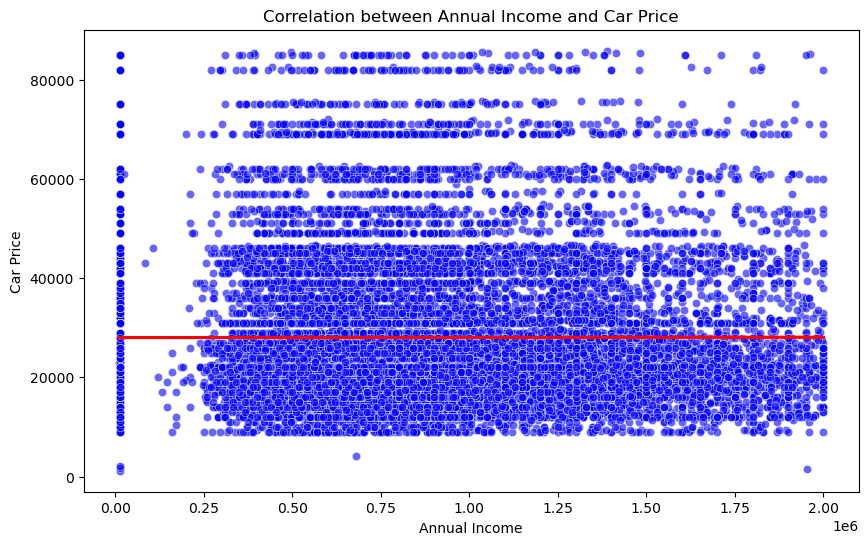

In [433]:
# Scatterplot of Annual Income vs. Car Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='price', data=cardata, color='blue', alpha=0.6)

# Adding a regression line to visualize correlation
sns.regplot(x='annual_income', y='price', data=cardata, scatter=False, color='red')

# Labels and Title
plt.title('Correlation between Annual Income and Car Price')
plt.xlabel('Annual Income')
plt.ylabel('Car Price')
plt.show()


The scatterplot shows that car prices are relatively independent of the buyer's annual income, as there is no distinct trend suggesting that higher income leads to purchasing more expensive vehicles.

#### Regional Analysis <a class="anchor" id="section3_4"></a>

* This section explores car sales across various regions, analyzing the performance of different companies within specific geographical contexts.
* By examining metrics such as sales volume, average income, and demographic distributions, patterns can be uncovered that reveal why certain brands excel in particular areas, enhancing the understanding of market dynamics and regional consumer behavior.

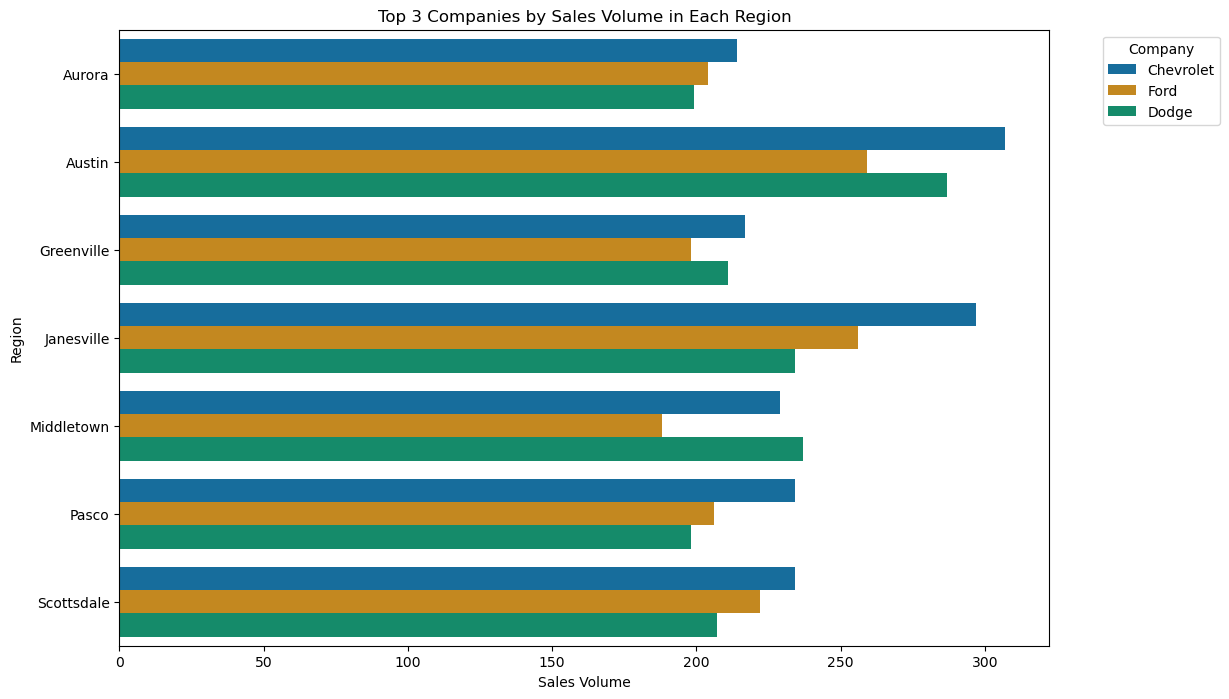

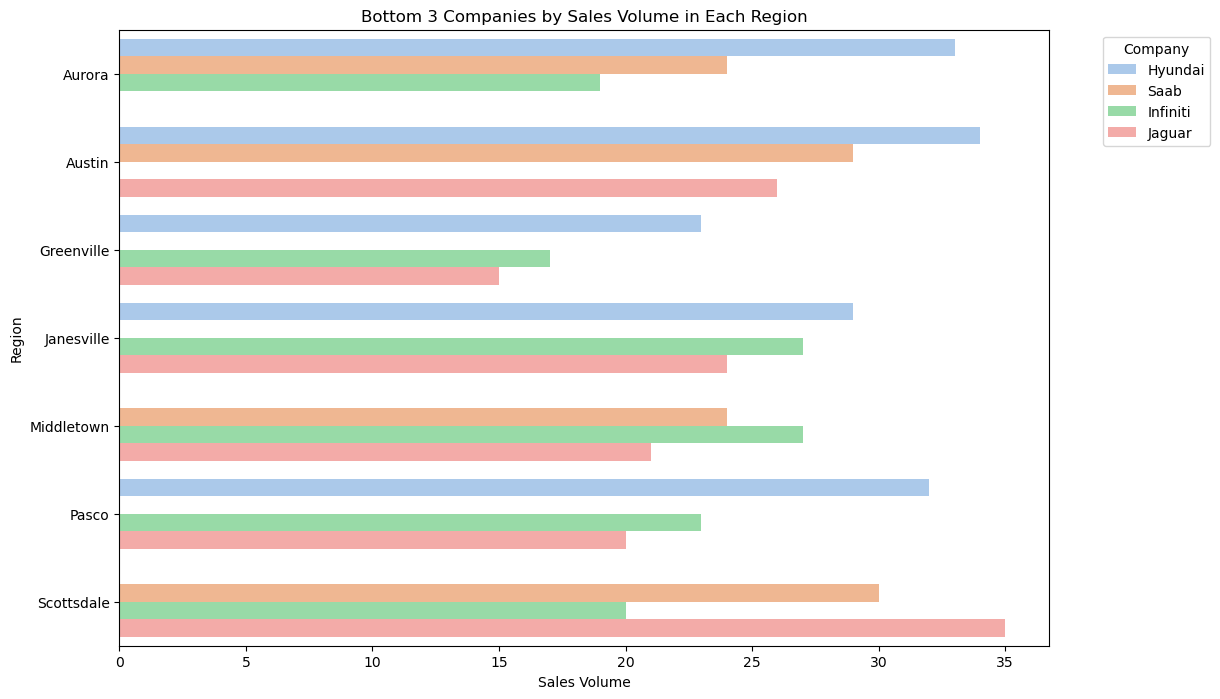

In [436]:
# Group by region and company to calculate sales volume
region_sales = cardata.groupby(['dealer_region', 'company']).size().reset_index(name='sales_volume')

# Sort the data by region and sales volume
region_sales_sorted = region_sales.sort_values(['dealer_region', 'sales_volume'], ascending=[True, False])

# Select top 3 and least 3 companies per region
top_3_per_region = region_sales_sorted.groupby('dealer_region').head(3)
bottom_3_per_region = region_sales_sorted.groupby('dealer_region').tail(3)
# Plot for top 3 companies per region
plt.figure(figsize=(12, 8))
sns.barplot(x='sales_volume', y='dealer_region', hue='company', data=top_3_per_region, dodge=True, palette='colorblind')
plt.title('Top 3 Companies by Sales Volume in Each Region')
plt.xlabel('Sales Volume')
plt.ylabel('Region')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot for bottom 3 companies per region
plt.figure(figsize=(12, 8))
sns.barplot(x='sales_volume', y='dealer_region', hue='company', data=bottom_3_per_region, dodge=True, palette='pastel')
plt.title('Bottom 3 Companies by Sales Volume in Each Region')
plt.xlabel('Sales Volume')
plt.ylabel('Region')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* The analysis of the three most popular car brands in each region reveals that Chevrolet, Ford, and Dodge consistently emerge as top sellers. This trend highlights the strong market positions of these brands and the effectiveness of their sales strategies.
* In contrast, the analysis of the three least popular car brands indicates a shifting landscape, with brands like Hyundai, Saab, Infiniti, and Jaguar frequently appearing at the bottom. This pattern suggests a potential need for these brands to reconsider their marketing strategies or adapt their offerings to better meet consumer preferences.

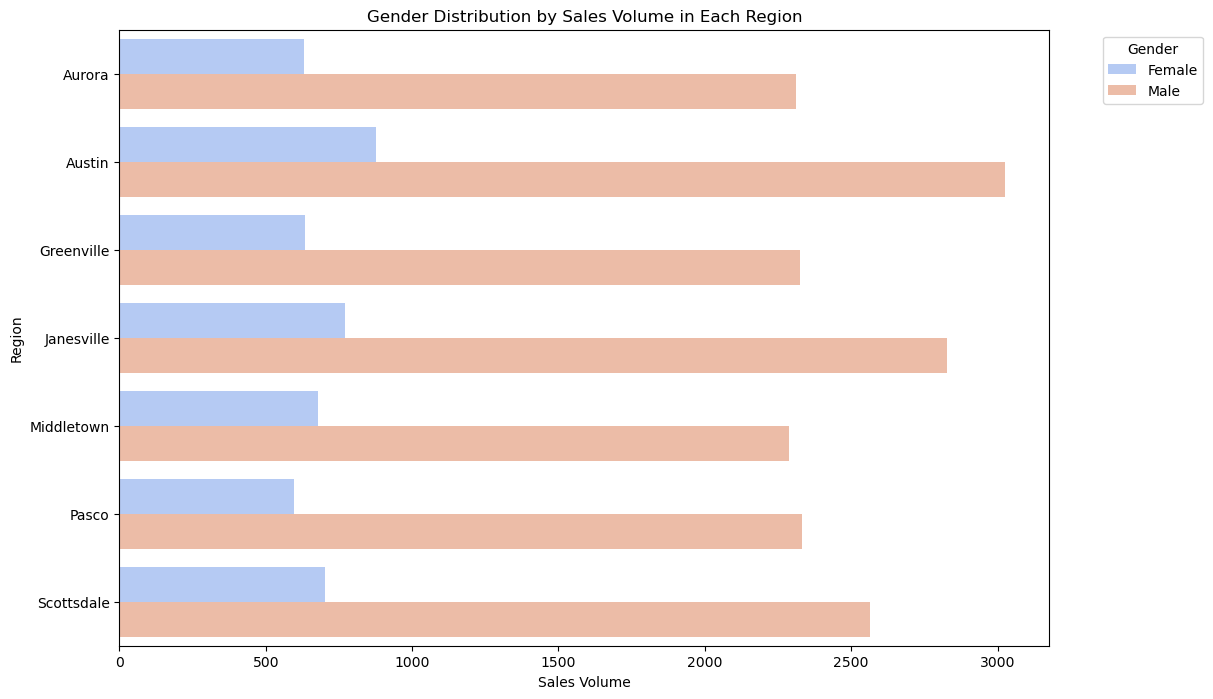

,dealer_region,gender,sales_volume,percentage
0,Aurora,Female,630,21.428571
1,Aurora,Male,2310,78.571429
2,Austin,Female,878,22.489754
3,Austin,Male,3026,77.510246
4,Greenville,Female,633,21.406831
5,Greenville,Male,2324,78.593169
6,Janesville,Female,771,21.416667
7,Janesville,Male,2829,78.583333
8,Middletown,Female,679,22.900506
9,Middletown,Male,2286,77.099494


In [438]:
# Group by region and gender to get sales volume for each gender
gender_distribution = cardata.groupby(['dealer_region', 'gender']).size().reset_index(name='sales_volume')

# Calculate total sales for each region
total_sales_per_region = gender_distribution.groupby('dealer_region')['sales_volume'].transform('sum')

# Calculate percentage of sales for each gender within each region
gender_distribution['percentage'] = (gender_distribution['sales_volume'] / total_sales_per_region) * 100

# Plot gender distribution by region
plt.figure(figsize=(12, 8))
sns.barplot(x='sales_volume', y='dealer_region', hue='gender', data=gender_distribution, dodge=True, palette='coolwarm')
plt.title('Gender Distribution by Sales Volume in Each Region')
plt.xlabel('Sales Volume')
plt.ylabel('Region')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

gender_distribution

* The analysis of gender distribution in vehicle sales reveals a significant male dominance, with males accounting for approximately 77-79% of sales across all regions. This confirms a trend of males being the primary buyers of vehicles, as seen before.
* Female representation remains consistent but lower, ranging from 21-23% in all regions. This consistent underrepresentation suggests a potential opportunity for dealerships to enhance marketing strategies aimed at attracting female customers.

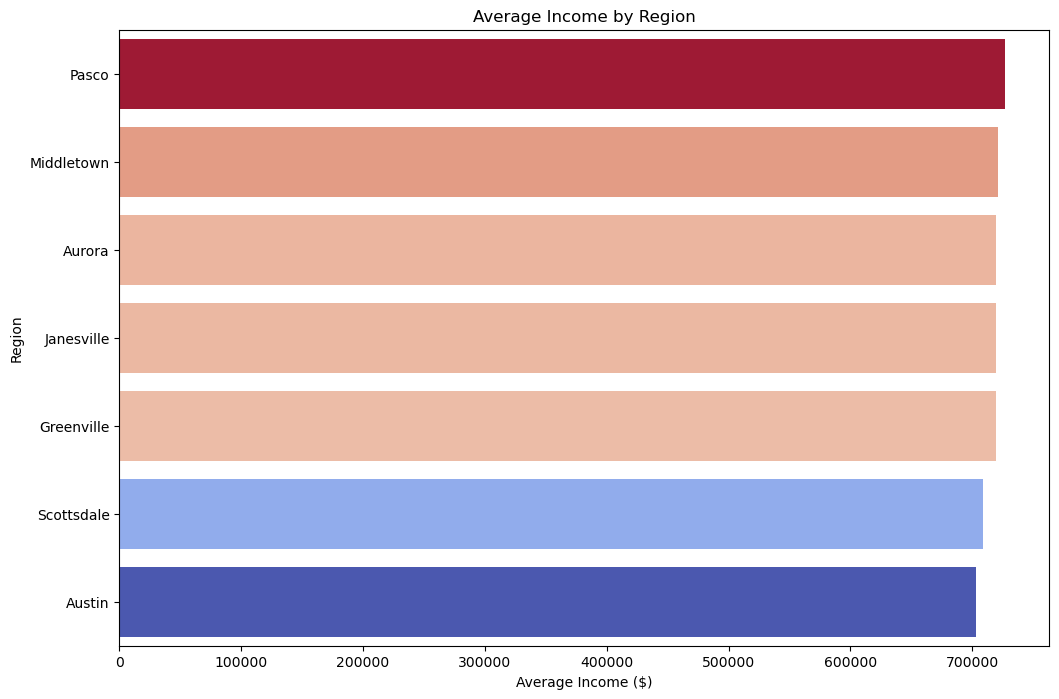

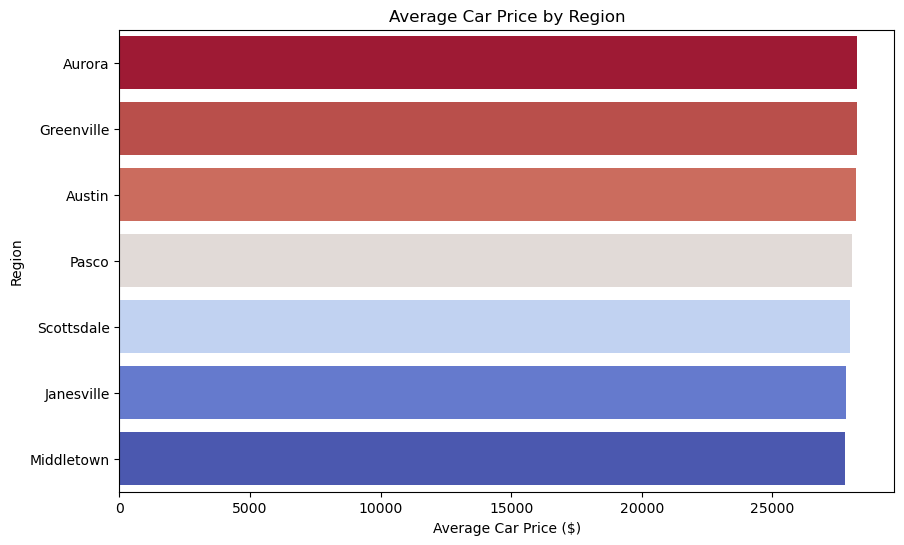

  dealer_region         price
0        Aurora  28254.006122
2    Greenville  28223.439297
1        Austin  28196.646773
5         Pasco  28028.667008
6    Scottsdale  27960.518666
3    Janesville  27823.813056
4    Middletown  27784.358516
  dealer_region  annual_income
5         Pasco  726953.342204
4    Middletown  721350.527825
0        Aurora  719681.008163
3    Janesville  719467.378611
2    Greenville  719068.474806
6    Scottsdale  708578.708384
1        Austin  703433.780994


In [440]:
# Group by region and calculate average income
income_by_region = cardata.groupby('dealer_region')['annual_income'].mean().reset_index()
income_by_region = income_by_region.sort_values(by='annual_income', ascending=False)

# Plot average income by region
plt.figure(figsize=(12, 8))
sns.barplot(x='annual_income', y='dealer_region', data=income_by_region, hue='annual_income', palette='coolwarm')
plt.title('Average Income by Region')
plt.xlabel('Average Income ($)')
plt.ylabel('Region')
plt.legend([],[], frameon=False)
plt.show()

# Calculate the average car price by region
average_price_by_region = cardata.groupby('dealer_region')['price'].mean().reset_index()
average_price_by_region = average_price_by_region.sort_values(by='price', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='dealer_region', data=average_price_by_region, hue='price', palette='coolwarm')
plt.title('Average Car Price by Region')
plt.xlabel('Average Car Price ($)')
plt.ylabel('Region')
plt.legend([],[], frameon=False)
plt.show()

print(average_price_by_region)
print(income_by_region)

* The annual incomes also show a narrow range, with Pasco having the highest at around 726,953, and Austin at the lowest with about 703,434. The differences in income levels are less than 25,000, which is not substantial considering the overall income landscape.

* The average car prices range from approximately 27,784 in Middletown to 28,254 in Aurora. The differences in car prices are relatively small, indicating a tight market range within a few hundred dollars.

* Overall, there are no significant disparities in both average car prices and annual incomes among the regions

#### Engine & Transmission Preferences <a class="anchor" id="section3_5"></a>

* This section investigates consumer preferences regarding engine types and transmission systems in car purchases, highlighting the factors influencing these choices.

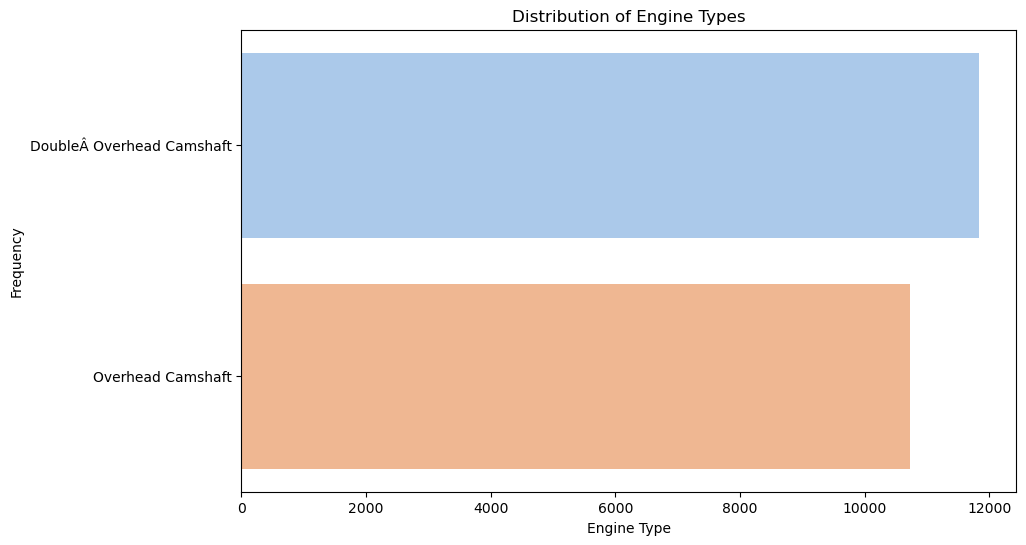

engine
DoubleÂ Overhead Camshaft    11841
Overhead Camshaft            10724
Name: count, dtype: int64

In [443]:
# Plot engines barplot
plt.figure(figsize=(10, 6))
sns.countplot(data=cardata, y='engine', hue='engine', palette='pastel')
plt.title('Distribution of Engine Types')
plt.xlabel('Engine Type')
plt.ylabel('Frequency')
plt.show()

cardata.engine.value_counts()

* The analysis of engine preferences reveals a slight edge for the Double Overhead Camshaft (DOHC) engine, with 11,841 units sold compared to 10,724 units for the Overhead Camshaft (OHC). However, the difference is not significant, indicating a relatively balanced consumer preference between the two engine types.

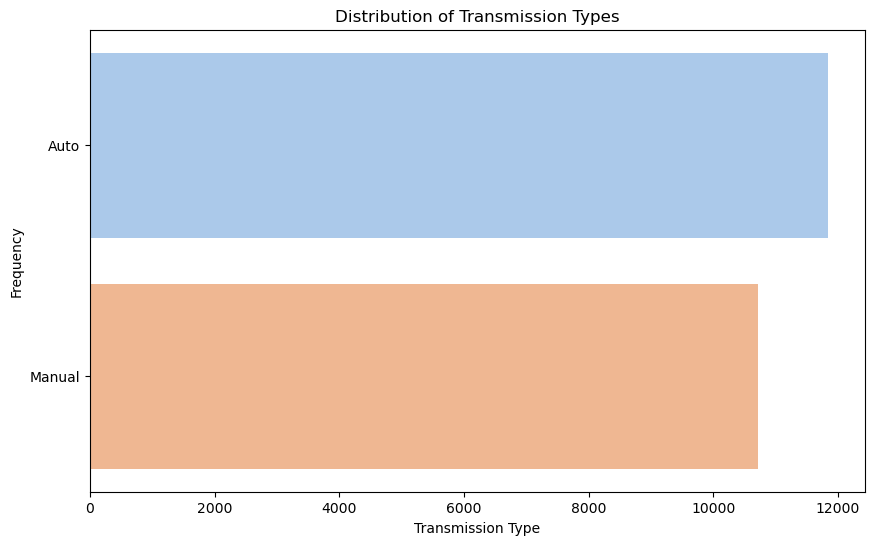

transmission
Auto      11841
Manual    10724
Name: count, dtype: int64

In [445]:
# Plot transmisions barplot
plt.figure(figsize=(10, 6))
sns.countplot(data=cardata, y='transmission', hue='transmission', palette='pastel')
plt.title('Distribution of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Frequency')
plt.show()

cardata.transmission.value_counts()

* The analysis reveals a modest difference in transmission preferences, with automatic transmissions (11,841) slightly more popular than manuals (10,724). However, there are concerns that transmission type may be linked to engine type, as powerful engines often pair with automatics, while smaller engines might favor manuals. 

#### Color & Body Style Preferences <a class="anchor" id="section3_6"></a>

* This section analyzes the preferences of consumers regarding car colors and body styles, revealing trends that may indicate broader market preferences.

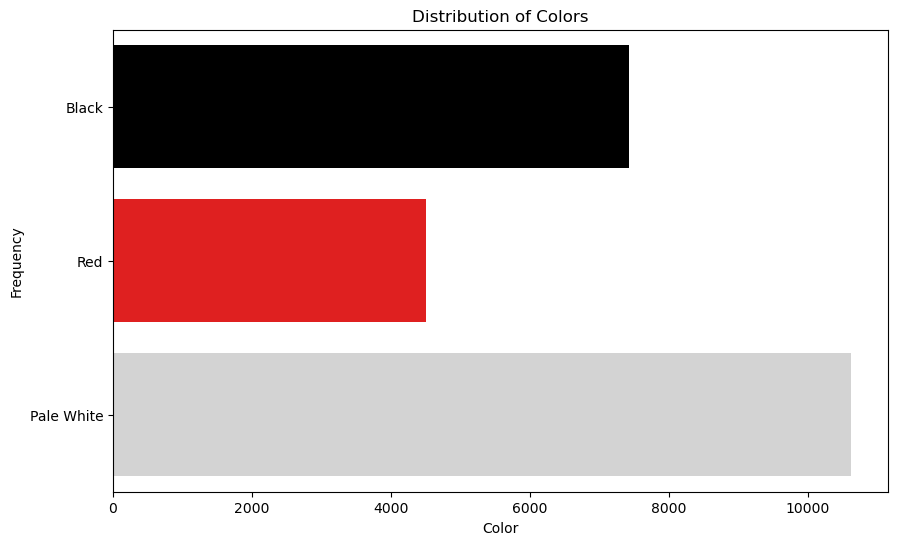

color
Pale White    10624
Black          7430
Red            4511
Name: count, dtype: int64

In [448]:
# Define custom colors
custom_palette = ['black', 'red', '#D3D3D3']
# Plot colors barplot
plt.figure(figsize=(10, 6))
sns.countplot(data=cardata, y='color', hue='color', palette=custom_palette)
plt.title('Distribution of Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.show()

cardata.color.value_counts()

* The analysis shows that color preferences lean heavily towards Pale White (10,624), followed by Black (7,430) and Red (4,511). The color preferences indicate a strong inclination towards Pale White, which is likely favored for its easier maintenance and ability to conceal dirt and scratches. Black remains popular as a classic choice, while Red is less favored, suggesting that brighter colors do not attract as much interest.

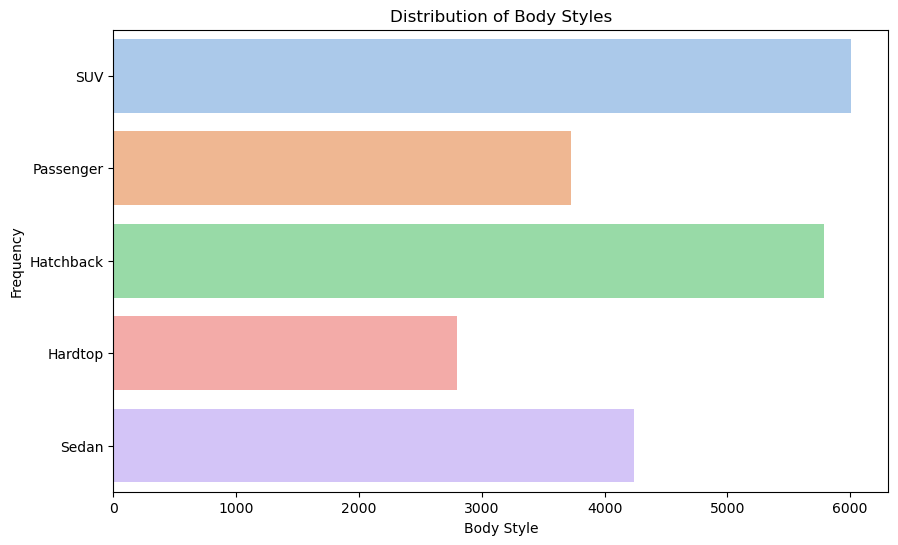

body_style
SUV          6011
Hatchback    5790
Sedan        4241
Passenger    3724
Hardtop      2799
Name: count, dtype: int64

In [450]:
# Plot body styles barplot
plt.figure(figsize=(10, 6))
sns.countplot(data=cardata, y='body_style', hue='body_style', palette='pastel')
plt.title('Distribution of Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Frequency')
plt.show()

cardata.body_style.value_counts()

* The body style preferences reveal a clear dominance of SUVs, which lead in popularity, followed closely by Hatchbacks. Sedans and Passenger vehicles have lower demand, while Hardtops are the least preferred option. This trend indicates a consumer preference for larger vehicles that offer more space and versatility.

#### Market Trends <a class="anchor" id="section3_7"></a>


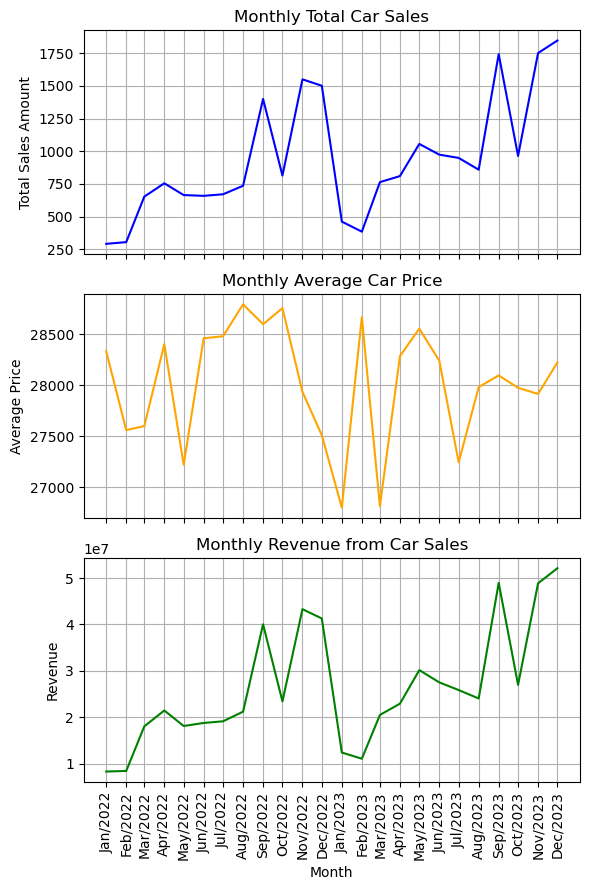

In [520]:
# Extract month and year from the date
cardata['month'] = cardata['date'].dt.to_period('M')

# Group by month and calculate total sales, average price, and revenue
monthly_data = cardata.groupby('month').agg(
    total_sales=('price', 'size'),
    average_price=('price', 'mean'),
    revenue=('price', 'sum')  
).reset_index()

# Convert 'month' back to a datetime object for plotting
monthly_data['month'] = monthly_data['month'].dt.to_timestamp()

# Create subplots
fig, ax1 = plt.subplots(3, 1, figsize=(6, 9), sharex=True)

# Plot for Total Sales
sns.lineplot(data=monthly_data, x='month', y='total_sales', ax=ax1[0], color='blue')
ax1[0].set_title('Monthly Total Car Sales')
ax1[0].set_ylabel('Total Sales Amount')
ax1[0].grid()

# Plot for Average Price
sns.lineplot(data=monthly_data, x='month', y='average_price', ax=ax1[1], color='orange')
ax1[1].set_title('Monthly Average Car Price')
ax1[1].set_ylabel('Average Price')
ax1[1].grid()

# Plot for Revenue
sns.lineplot(data=monthly_data, x='month', y='revenue', ax=ax1[2], color='green')
ax1[2].set_title('Monthly Revenue from Car Sales')
ax1[2].set_ylabel('Revenue')
ax1[2].grid()

# Set common x-label
plt.xlabel('Month')
plt.xticks(ticks=monthly_data.month, labels=monthly_data.month.dt.strftime('%b/%Y'), rotation=90)
plt.tight_layout()
plt.show()


* Sales fluctuate throughout the two years, with a significant spike in September 2022 (1400 units) and even higher in November 2023 (1751 units). These peak sales months drive substantial revenue.
* While the average price of cars remains relatively stable across months, hovering around 27,500 to 28,500, it slightly dips in some months (e.g., January 2023) and peaks in others (e.g., August 2022).
* Revenue correlates strongly with total sales, with the highest revenues recorded during months of high sales (e.g., September 2023 with 48.9M and December 2023 with 52.1M).
* The analysis indicates strong monthly sales performance, with particular peaks suggesting seasonal influences or effective marketing strategies. The fluctuations in average prices hint at strategic pricing adjustments to align with market demand and inventory management. Overall, the growth trajectory in sales and revenue suggests a healthy market for car sales, with opportunities to optimize pricing strategies further based on consumer behavior trends observed in the data.

### Conclusion <a class="anchor" id="conclusion"></a>

**Findings Overview**
* The analysis highlights strong regional sales patterns and significant seasonality in the data, with noticeable sales peaks in specific months, particularly September and November.
* Chevrolet, Ford, and Dodge emerge as the dominant car brands across all regions, while Hyundai, Saab, and Jaguar lag in popularity, suggesting a potential need for strategic reevaluation by less popular brands.
* Engine and transmission preferences are quite balanced, with a slight inclination towards automatic transmissions and dual overhead camshaft engines, though the difference is not drastic.
* Pale White is the most popular color choice, potentially due to easier maintenance, followed by Black. Red is the least preferred, indicating a more conservative color preference among customers.
* SUVs and Hatchbacks are the most favored body styles, with Sedans trailing behind, revealing a market preference for larger, more versatile vehicles.

**Next Steps** 
* Further analysis could explore the impact of marketing strategies and promotions on sales performance during peak months and for less popular brands.
* Examining long-term sales trends and incorporating additional external factors, such as economic conditions or competitor activity, would help to identify broader market influences.
* Investigating seasonal trends and how they affect customer preferences for vehicle types, colors, and features can refine sales forecasts and inventory planning.
